In [1]:
pip install pandas

In [2]:
pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/Salaries.csv')

In [5]:
print(df.head())

   Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay  OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.00  400184.25       NaN  567595.43         567595.43   
1  155966.02    245131.88  137811.38       NaN  538909.28         538909.28   
2  212739.13    106088.18   16452.60       NaN  335279.91         335279.91   
3   77916.00     56120.71  198306.90       NaN  332343.61         332343.61   
4  134401.60      9737.00  182234.59       NaN  326373.19         326373.19   

     Year  Notes         Agency  Status  
0  2011.0    NaN  San Fran

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69130 entries, 0 to 69129
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                69130 non-null  int64  
 1   EmployeeName      69130 non-null  object 
 2   JobTitle          69129 non-null  object 
 3   BasePay           69129 non-null  float64
 4   OvertimePay       69129 non-null  float64
 5   OtherPay          69129 non-null  float64
 6   Benefits          32970 non-null  float64
 7   TotalPay          69129 non-null  float64
 8   TotalPayBenefits  69129 non-null  float64
 9   Year              69129 non-null  float64
 10  Notes             0 non-null      float64
 11  Agency            69129 non-null  object 
 12  Status            0 non-null      float64
dtypes: float64(9), int64(1), object(3)
memory usage: 6.9+ MB
None


In [7]:
df['BasePay'] = pd.to_numeric(df['BasePay'], errors='coerce')
average_basepay = df['BasePay'].mean()
print(average_basepay)

67898.08945999508


In [8]:
df['OvertimePay']=pd.to_numeric(df['OvertimePay'], errors='coerce')
Highest=df["OvertimePay"].max()
print(Highest)

245131.88


In [9]:
job_title = df.loc[df['EmployeeName'].str.contains('JOSEPH DRISCOLL', case=False), 'JobTitle'].values[0]
print(job_title)

CAPTAIN, FIRE SUPPRESSION


In [10]:
total_pay_benefits = df.loc[df['EmployeeName'].str.contains('JOSEPH DRISCOLL', case=False), 'TotalPayBenefits'].values[0]
print(total_pay_benefits)

270324.91


In [11]:
highest_paid_person = df.loc[df['TotalPayBenefits'].idxmax(), 'EmployeeName']
print(highest_paid_person)

NATHANIEL FORD


In [12]:
lowest_paid_person = df.loc[df['TotalPayBenefits'].idxmin(), 'EmployeeName']
print(lowest_paid_person)

PAULETTE ADAMS


In [13]:
filtered_df = df[(df['Year'] >= 2011) & (df['Year'] <= 2014)]
average_basepay = filtered_df['BasePay'].mean()
print(average_basepay)

67898.08945999508


In [14]:
unique_job_titles = df['JobTitle'].nunique()
print(unique_job_titles)

2080


In [15]:
top_jobs = df['JobTitle'].value_counts().head(5)
print(top_jobs)

JobTitle
TRANSIT OPERATOR    2388
Transit Operator    2142
SPECIAL NURSE       1402
Registered Nurse    1256
REGISTERED NURSE    1219
Name: count, dtype: int64


In [16]:
unique_job_titles_2013 = df[df['Year'] == 2013]['JobTitle'].value_counts()
job_titles_one_person_2013 = unique_job_titles_2013[unique_job_titles_2013 == 1]

print(job_titles_one_person_2013)
print(job_titles_one_person_2013.count())

Series([], Name: count, dtype: int64)
0


In [17]:
chief_count = df['JobTitle'].fillna('').str.contains('Chief', case=False).sum()
print(chief_count)

345


In [18]:
df['JobTitleLength'] = df['JobTitle'].str.len()
correlation = df['JobTitleLength'].corr(df['TotalPayBenefits'])
print(correlation)

-0.025650191264586897


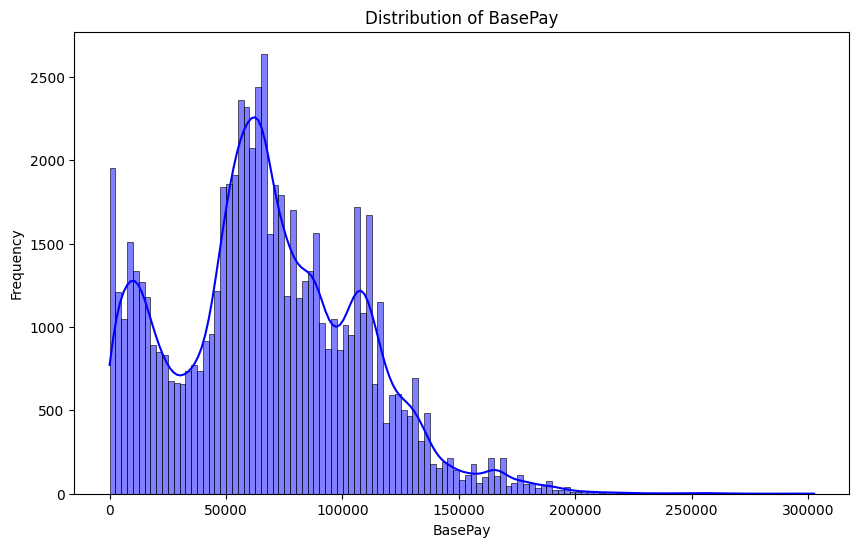

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['BasePay'].dropna(), kde=True, color='blue')
plt.title('Distribution of BasePay')
plt.xlabel('BasePay')
plt.ylabel('Frequency')
plt.show()

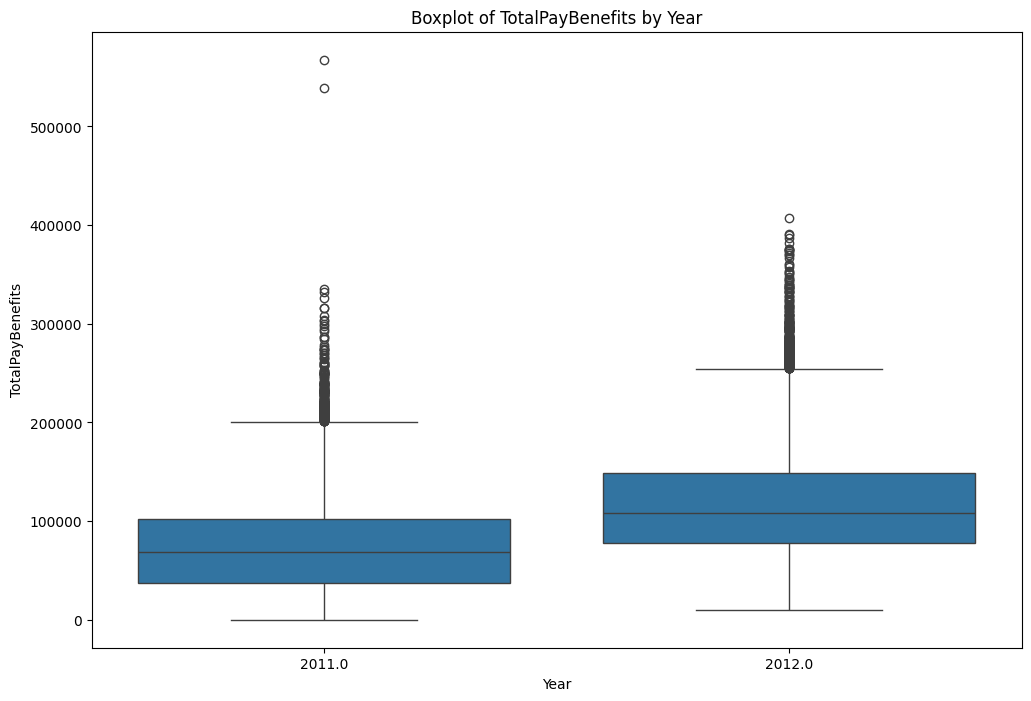

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='TotalPayBenefits', data=df)
plt.title('Boxplot of TotalPayBenefits by Year')
plt.xlabel('Year')
plt.ylabel('TotalPayBenefits')
plt.show()

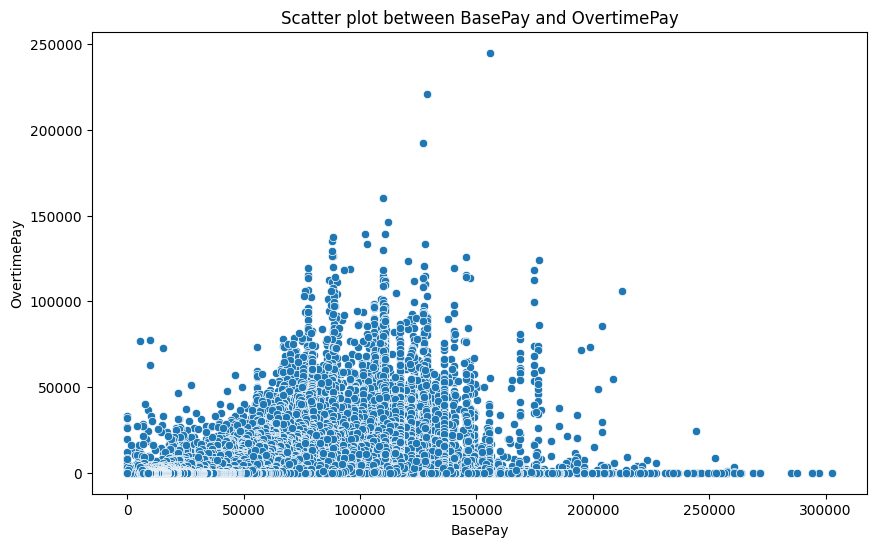

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BasePay', y='OvertimePay', data=df)
plt.title('Scatter plot between BasePay and OvertimePay')
plt.xlabel('BasePay')
plt.ylabel('OvertimePay')
plt.show()